# Session 1: Introduction to Conduction Heat Transfer

## Prelude

What do we want to learn in this class? 
- Heat transfer, but also: why heat transfer could be important to your graduate research, and what are some key practical takeaways for your research and future career aspirations 
- Conventionally: concepts, with a lot of math. Math is hard. Therefore, we'll use Python to do the legwork for us. Also, concepts can be nebulous. We'll use Python to visualize things and practical demos/projects to illustrate and test our understanding

## Introduction

What is heat transfer? **Heat transfer is thermal energy in transit due to a spatial temperature difference** 

Some practical applications of heat transfer:
- Thermoelectric coolers in computers and some refrigerators
- Air and liquid coolants for electric vehicle battery packs 

Three modes of heat transfer
- Conduction: process of heat transfer by molecular motion, along with flow of free electrons and lattice vibrations from regions of high temperature to regions of low temperature
- Convection: process of heat transfer by movement of fluid 
- Radiation: process of heat transfer in the form of electromagnetic waves (i.e. materials emit radiation as a result of their temperature)
*in practice, heat transfer occurs by a combination of all 3, but for simplicity we focus on each aspect separately 

What is conduction? **Heat transfer that occurs across a medium**
- Temperature is generally associated with the energy of gas molecules in proximity to a reference point, and is related to both random translational motion and internal rotational and vibrational motions of molecules
- However, engineers don't really care about every single molecular action. We work with practical devices like batteries, automobiles and HVAC systems, so generally we assume a macroscopic average. 

### Thermo redux
- A **system** is an arbitrary collection of matter of fixed identity, bounded by a closed surface. Everything else is known as the **surroundings** 
- 1st Law of Thermo: $$ dE = \delta Q - \delta W $$ for an infinitesimal change of state during time interval dt (i.e. "energy cannot be created or destroyed, only transferred")
- 2nd Law of Thermo: a system cannot move heat from low to high temperature if unaided by something external $$ dS = \frac{\delta Q}{T}_{rev} $$

### Fourier's Law of Heat Conduction
- Consider a solid flat plate of thickness L (other dimensions are much larger). Let T1 and T2 be the two surface temperatures and A the surface area. From the 2nd Law, we know heat will flow from the higher temp (say T1) to the lower temp (say T2) surface. 

### Rate of heat transfer through solid flat plate under steady-state conditions and no internal energy sources or sinks 

No internal energy sources or sinks: consider a thin slab of the plate to be the system, if there is no internal energy source or sink, then $$ q(x) = q(x + \Delta x) $$. In other words, the flow of heat in is equivalent to the flow of heat out. 

As $$ \Delta x $$ --> 0, $$ q(x+\Delta x) = q(x) + dq/dx \Delta x $$, and $$ dq/dx = 0, or q = constant $$

Empirically, q is found to be directly proportional to surface area A and the temperature difference (T1 - T2), and inversely proportional to thickness L: $$ q ~ A*\frac{T1 - T2}{L} $$, or $$ q = -kA \frac{dT}{dx} $$, which is Fourier's Law of Heat Conduction for a one-dimensional system. 

k has units of W/m-K and is called the **thermal conductivity**

The heat flux is the amount of heat transferrede per unit time across unit area: $$ q" = q/A = -k \frac{dT}{dx} $$

### Expression for the steady-state temperature distribution for a flat plate with thickness L 

From above, $$ dq/dx = 0 $$, and $$ q = -kA \frac{dT}{dx} $$, so $$ \frac{d}{dx}(-kA \frac{dT}{dx}) = 0 $$

since k and A are invariant with x, $$ \frac{d^{2}T}{dx^{2}} = 0 $$ and $$ T(x) = ax + b $$ 

taking boundary conditions $$ T(x = 0) = T1, T(x = L) = T2 $$, $$ B = T1, A = \frac{T2-T1}{L} $$

therefore, $$ T(x) = \frac{T2 - T1}{L}x + T1 $$

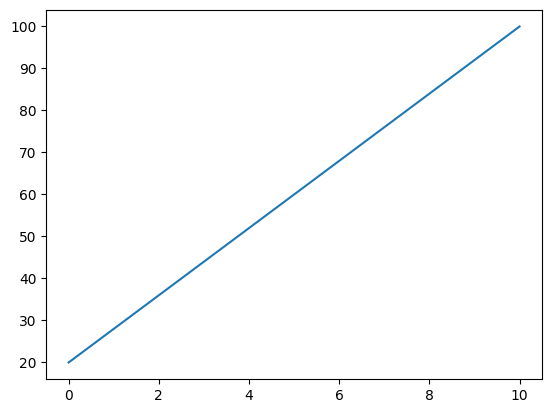

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

L = 10 #cm
T1 = 100 #Celsius
T2 = 20 #Celsius

x = np.linspace(0, 10, 100)
T = (T2-T1)/L * x + T1

figure = plt.figure(1)
ax1 = figure.add_subplot(111)

ax1.plot(x,T)

plt.show()